In [ ]:

!pip install librosa
!pip install pysoundfile
!pip install IPython

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import soundfile as sf 
from IPython.display import Audio
import matplotlib.pyplot as plt
import pandas as pd
import librosa
import librosa.display

In [ ]:
import shutil
import os

In [ ]:
cur_dir = os.chdir('/content/drive/MyDrive/spectro/classes')
cur_dir = os.getcwd()
data = []
for i in os.path.join(cur_dir, 'bonafide'):
    data.append(i)
    

print(len(data))

47


In [ ]:
# reading labels from
text = pd.read_csv('/content/drive/MyDrive/data/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.eval.trl.txt', sep=" ", header=None)
# give apropreate coumn name to the labels
text.columns = ["-", "clip", "-", "-", "label"]

In [ ]:
    dir_path = '/content/drive/MyDrive/ASVspoof_root/data_logical/la_eval/flac'

In [ ]:
# Verify the audios are present in the corresponding folder

# path to first audio in the folder 
sample_audio = dir_path+'/'+text["clip"][0]+".flac"

In [ ]:
# reading the audio file
clip, sample_rate = sf.read(sample_audio)


In [ ]:
# play audio
Audio(clip, rate = sample_rate)

In [ ]:
# function  to generate spectrogram and to seperate bonafide and spoofed audios 
#from the dataset according to their label
def save_spectogram(file_name,label):
    clip, sample_rate = sf.read(dir_path+"/"+file_name+".flac")
    file_name = file_name.split('/')[0]
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    
    filename = '/content/drive/MyDrive/eval_spectrum/'
    filename = filename+label
    filename = filename+file_name.replace('.flac','.png')
    plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close('all')

In [ ]:
x=len(text["clip"])
print(x)

71237


In [ ]:
 for file in range(0,10):
    save_spectogram(text["clip"][file],text["label"][file])

In [ ]:
 for file in range(10000,20000):
    save_spectogram(text["clip"][file],text["label"][file])

In [ ]:
 for file in range(20000,30000):
    save_spectogram(text["clip"][file],text["label"][file])

In [ ]:
for file in range(30000,40000):
    save_spectogram(text["clip"][file],text["label"][file])

In [ ]:
x=len(text["clip"])
print(x)

In [ ]:
y, sr = librosa.load('/content/drive/MyDrive/ASVspoof_root/data_logical/ASVspoof2019_LA_train_v1/flac/LA_T_1000137.flac)
S = librosa.feature.melspectrogram(y=y, sr=sr)

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
#plt.title('Mel spectrogram')
plt.savefig('melspectrogram', dpi=400, bbox_inches='tight',pad_inches=0)

In [ ]:
!pip install fastai

In [ ]:
from fastai.vision import *

In [ ]:
foldername = 'classes'
!mkdir {'/content/drive/MyDrive/spectro/' + foldername}
path = '/content/drive/MyDrive/spectro/specs/'
labpath = '/content/drive/MyDrive/spectro/classes/'


Label = { 'b':'bonafide'}

for key, value in Label.items():
    !mkdir {labpath + value}


for subdir, dir, files in os.walk(path):
    for filenames in files:
        if filenames[0] == 'b':
            shutil.copyfile(subdir+'/'+filenames, labpath+Label['b'])

In [ ]:
path = Path('/content/drive/MyDrive/spectro/classes/')

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=0).normalize(imagenet_stats)

In [ ]:
data.classes

['bonafide', 'spoof']

In [ ]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.fit_one_cycle(4)

In [ ]:
learn.save('stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


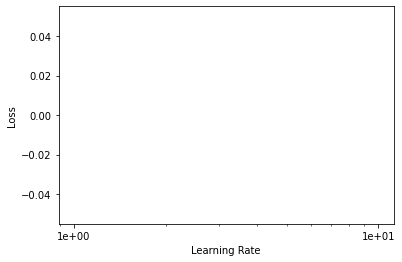

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,7e-6))

In [ ]:
learn.save('stage-2')

In [ ]:
learn.load('stage-2')

In [ ]:
learn.fit_one_cycle(4, max_lr=slice(1e-5,1e-4))

In [ ]:
learn.save('stage-3')

In [ ]:
gc.collect()

0